#Estatísticas de vendas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
dados = pd.read_csv('/content/E_commerce.csv')
dados1 = pd.read_csv('/content/dados.csv')

In [3]:
del dados ['Unnamed: 0']
del dados1 ['Unnamed: 0']

##Quantos clientes compraram mais que R$ 600,00?

In [7]:
boavenda = dados.loc[dados['Valor_da_venda']>600.0, 'Valor_da_venda']
print(' {:.2f} pessoas compraram mais que R$600,00'.format(boavenda.value_counts().sum()))

 42.00 pessoas compraram mais que R$600,00


##Qual a probabilidade de um cliente comprar mais quer R$600,00?

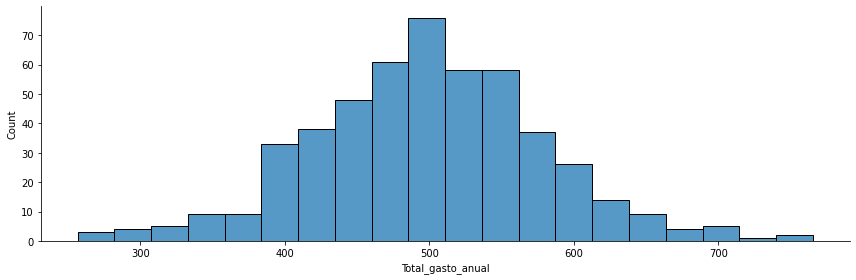

In [9]:
venda = dados1['Total_gasto_anual']
sns.displot(dados1, x = venda, height = 4, aspect = 3)

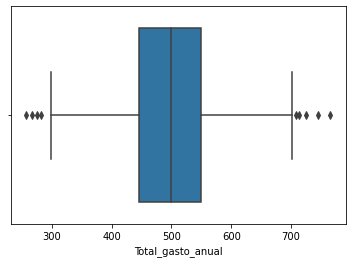

In [10]:
sns.boxplot(x = venda, dodge = True)

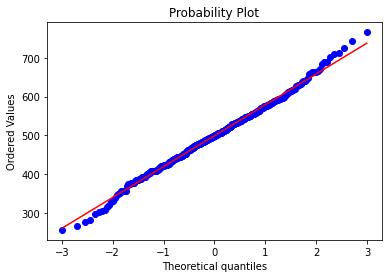

In [11]:
fig, ax = plt.subplots()
stats.probplot(venda, fit = True, plot = ax)
plt.show()

In [12]:
stats.shapiro(venda)

ShapiroResult(statistic=0.9961366057395935, pvalue=0.2643594741821289)

In [13]:
venda_anual = dados1['Total_gasto_anual']
print('Os clientes compraram em média {:.2f}'.format(venda_anual.mean()))
desv = np.std(venda_anual, ddof = 1)
print('O desvio padrão é {:.2f}'.format(desv))
prob = norm.sf(600, 499.31, 79.31)
prob1 = prob*100

Os clientes compraram em média 499.31
O desvio padrão é 79.31


In [14]:
print('A probabilidade de um cliente comprar mais de R$600,00 é {:.2f}%'.format(prob1))

A probabilidade de um cliente comprar mais de R$600,00 é 10.21%


##Qual a probabilidade um cliente que ficou mais de 12 min (média) no app, comprar mais que R$600,00?

In [15]:
dados1.loc[dados1['Tempo_app']>=12, 'Tempo_app']

0      12.655651
3      13.717514
4      12.795189
5      12.026925
7      12.351959
         ...    
493    12.625433
494    13.350632
495    13.566160
498    12.391423
499    12.418808
Name: Tempo_app, Length: 249, dtype: float64

In [16]:
min = dados1.loc[dados1['Tempo_app']>=12, 'Tempo_app']
min.index

Int64Index([  0,   3,   4,   5,   7,   8,  10,  13,  14,  15,
            ...
            481, 483, 485, 486, 488, 493, 494, 495, 498, 499],
           dtype='int64', length=249)

In [17]:
minutos = []
for x in min.index:
  minutos.append(venda_anual[x])

print(minutos)
print(len(minutos))

[587.9510539684005, 581.8523440352178, 599.4060920457634, 637.102447915074, 549.9041461052942, 570.2004089636195, 492.6060127179966, 573.4158673313865, 470.45273330095546, 461.7807421962299, 407.7045475495441, 452.31567548003545, 605.061038804892, 419.9387748391792, 436.51560572936256, 700.9170916173961, 619.8956398616368, 486.83893476506273, 497.5866713004408, 588.7126055095755, 491.0732236795197, 537.8461952695957, 591.1971781805905, 448.22982918655, 549.860590464497, 593.915002968289, 563.6728733601082, 725.5848140556805, 522.40414125956, 520.8987944502368, 547.3651405940458, 616.8515229667128, 613.5993233689068, 540.2634004105403, 765.5184619388372, 553.6015346844503, 595.8228366992037, 534.7771880994133, 578.2416050583773, 478.7193568742153, 489.8124879964614, 596.4301726172283, 487.3793060170291, 547.1259317471988, 505.1133435398579, 449.0703194428044, 611.0000251040717, 439.074766741645, 543.340166256701, 614.7153338263417, 507.39006178986654, 495.2994425473086, 518.064557984010

In [18]:
desvio = np.std(minutos)
print('Desvio padrão da venda dos clientes com mais de 12 min no app: {:.2f}'.format(desvio))
media = np.mean(minutos)
print('Média de venda dos clientes com mais de 12 min. no app: {:.2f}'.format(media))

Desvio padrão da venda dos clientes com mais de 12 min no app: 74.10
Média de venda dos clientes com mais de 12 min. no app: 532.08
